In [1]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import plotly.express as px

import cv2

from learning_connect.constants import Dirs, Defaults
from learning_connect import visualize_behavior as vis_beh
from learning_connect import visualize_participants as vis_part
from learning_connect import visualize_eye as vis_eye
from learning_connect import io as io

%load_ext autoreload
%autoreload 2

In [13]:
df = vis_eye.load_data()

df

,Unnamed: 0,Unnamed: 0.1,type,end_time,end_gx,amplitude,mean_gy,end_gy,surface,peak_velocity,...,start_time,block,exp_event,task,timestamp,onset_sec,event_type,run,subj,sess
0,0,0,fixations,1603926422,NaN,NaN,0.501262,NaN,unknown,NaN,...,1603926421,1,"starting instructions for visual_search, block...",visual_search,1603926421,1,instructions,1,04,1
4,4,4,fixations,1603926422,NaN,NaN,0.882828,NaN,unknown,NaN,...,1603926422,1,"starting instructions for visual_search, block...",visual_search,1603926422,2,instructions,1,04,1
5,5,5,fixations,1603926423,NaN,NaN,0.851382,NaN,unknown,NaN,...,1603926422,1,"starting instructions for visual_search, block...",visual_search,1603926422,2,instructions,1,04,1
9,9,9,fixations,1603926423,NaN,NaN,0.844585,NaN,unknown,NaN,...,1603926423,1,"starting instructions for visual_search, block...",visual_search,1603926423,3,instructions,1,04,1
10,10,10,fixations,1603926423,NaN,NaN,0.761131,NaN,unknown,NaN,...,1603926423,1,"starting instructions for visual_search, block...",visual_search,1603926423,3,instructions,1,04,1
17,17,17,fixations,1603926424,NaN,NaN,0.893226,NaN,unknown,NaN,...,1603926424,1,"starting instructions for visual_search, block...",visual_search,1603926424,4,instructions,1,04,1
18,18,18,fixations,1603926424,NaN,NaN,0.914450,NaN,unknown,NaN,...,1603926424,1,"starting instructions for visual_search, block...",visual_search,1603926424,4,instructions,1,04,1
19,19,19,fixations,1603926424,NaN,NaN,0.912110,NaN,unknown,NaN,...,1603926424,1,"starting instructions for visual_search, block...",visual_search,1603926424,4,instructions,1,04,1
24,24,24,fixations,1603926425,NaN,NaN,0.483424,NaN,unknown,NaN,...,1603926425,1,"starting instructions for visual_search, block...",visual_search,1603926425,5,instructions,1,04,1
25,25,25,fixations,1603926426,NaN,NaN,0.506332,NaN,unknown,NaN,...,1603926425,1,"starting instructions for visual_search, block...",visual_search,1603926425,5,instructions,1,04,1


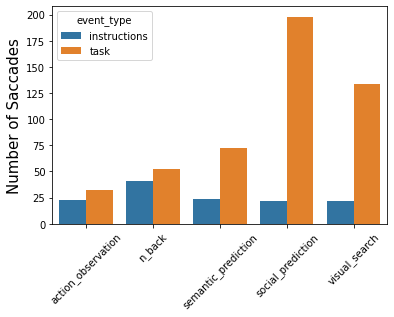

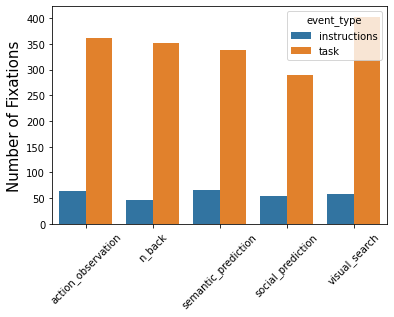

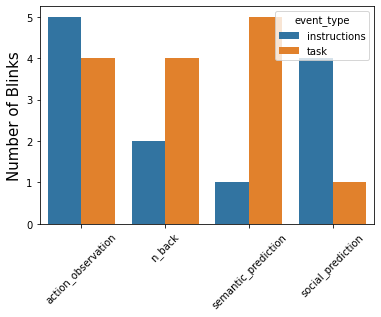

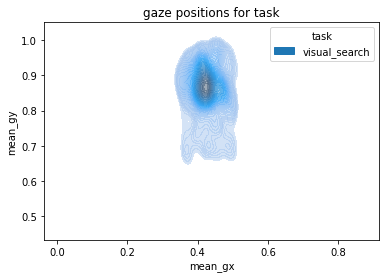

<Figure size 432x288 with 0 Axes>

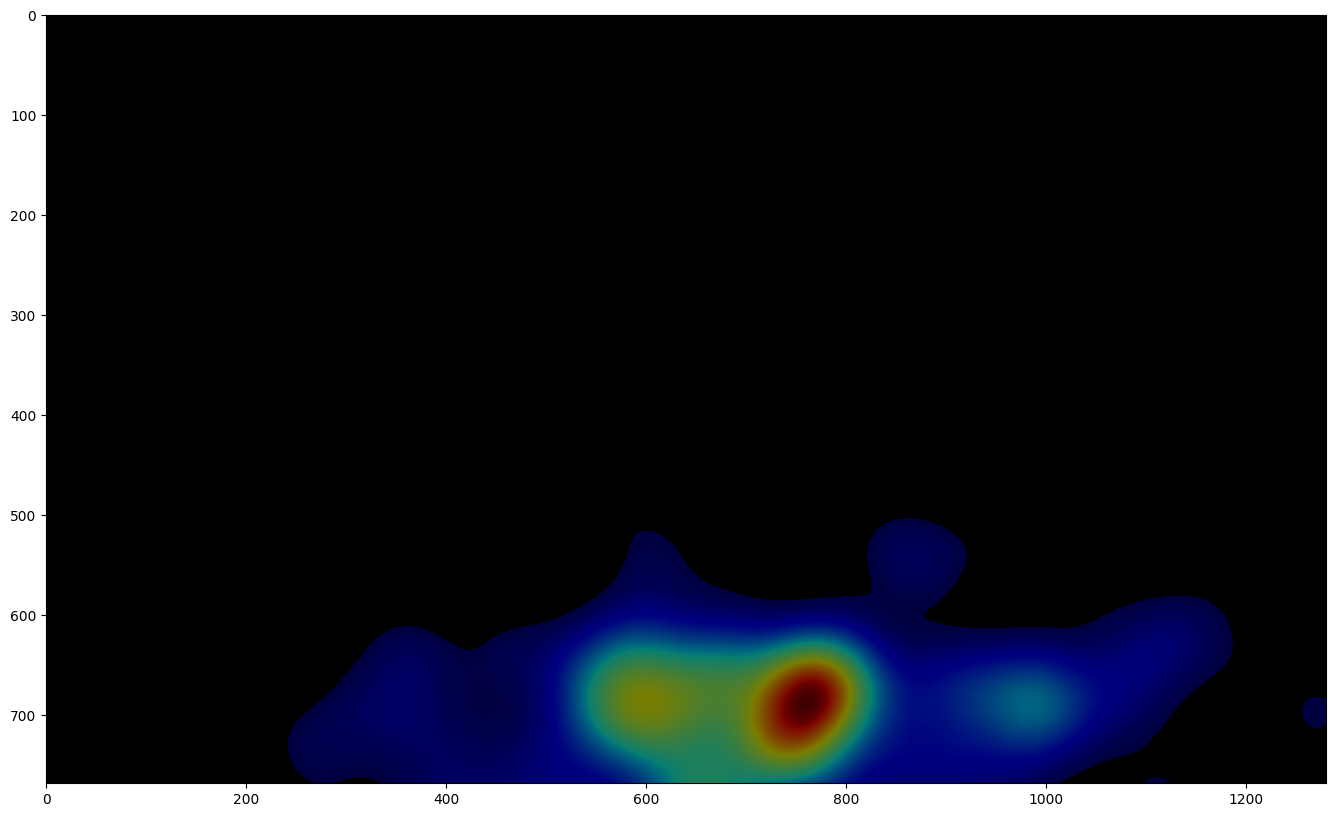

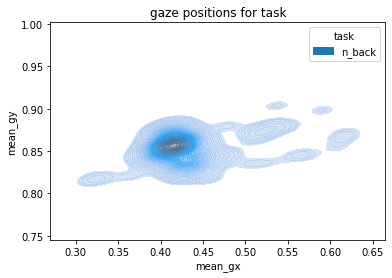

<Figure size 432x288 with 0 Axes>

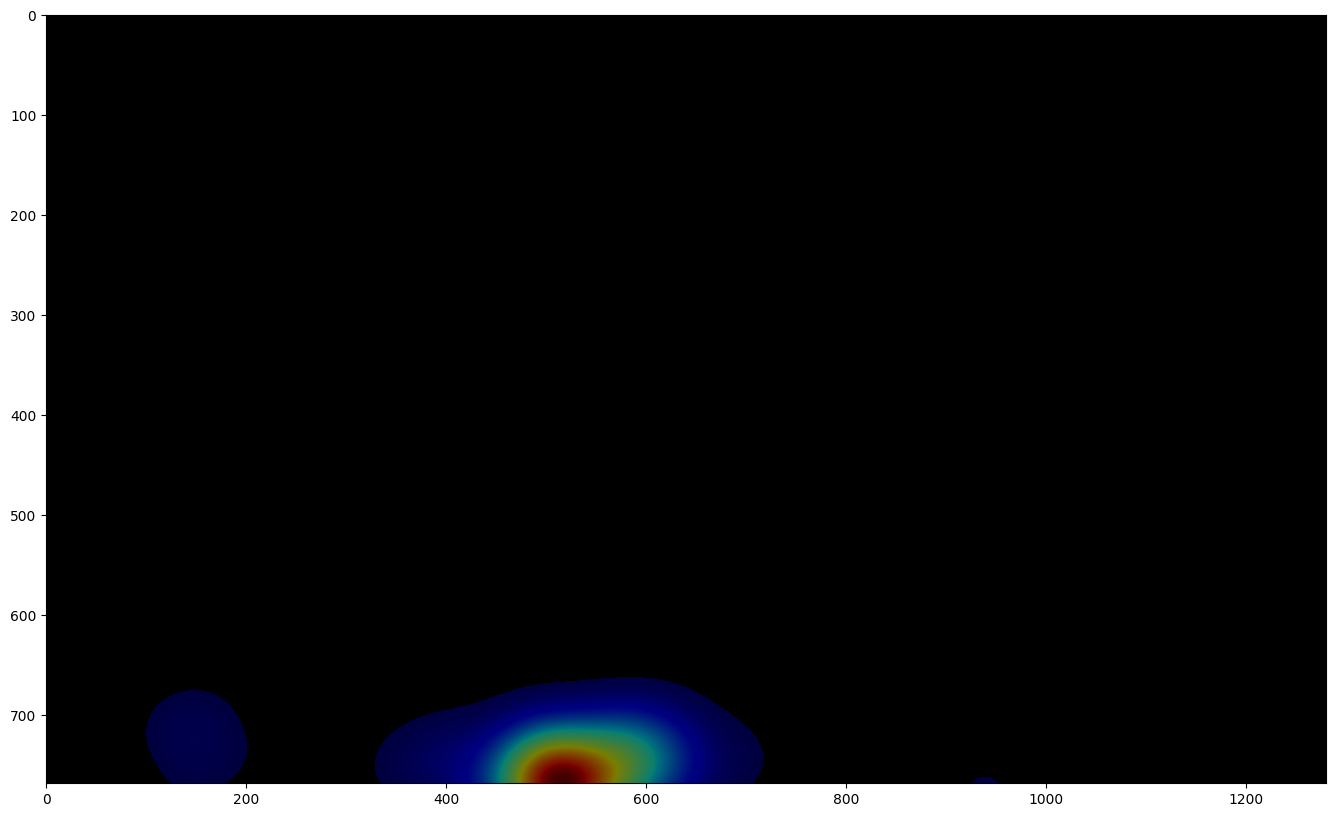

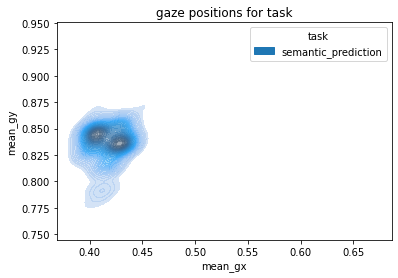

<Figure size 432x288 with 0 Axes>

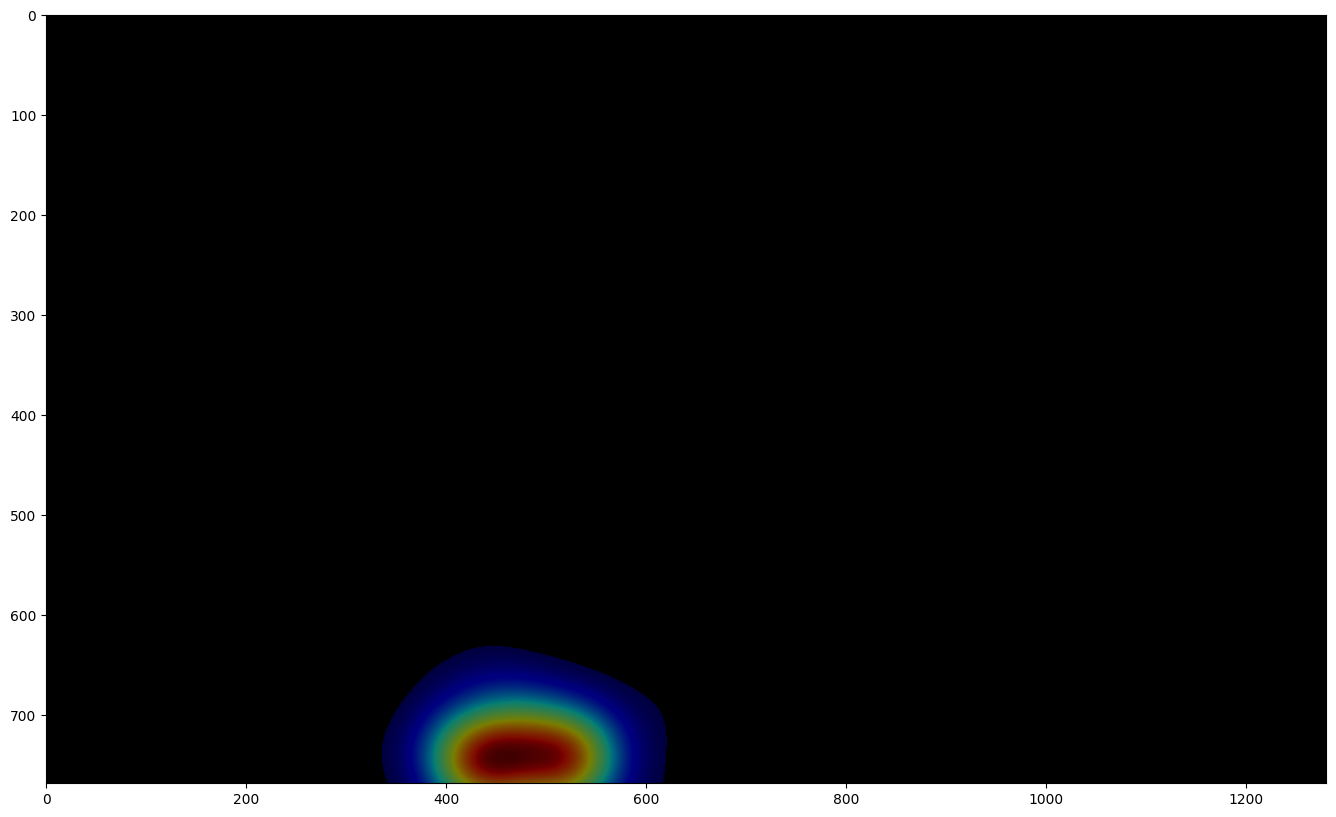

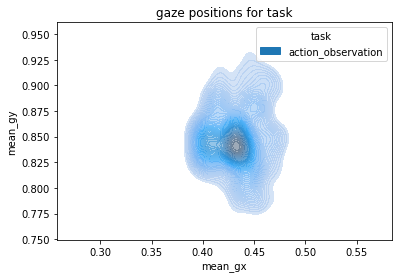

<Figure size 432x288 with 0 Axes>

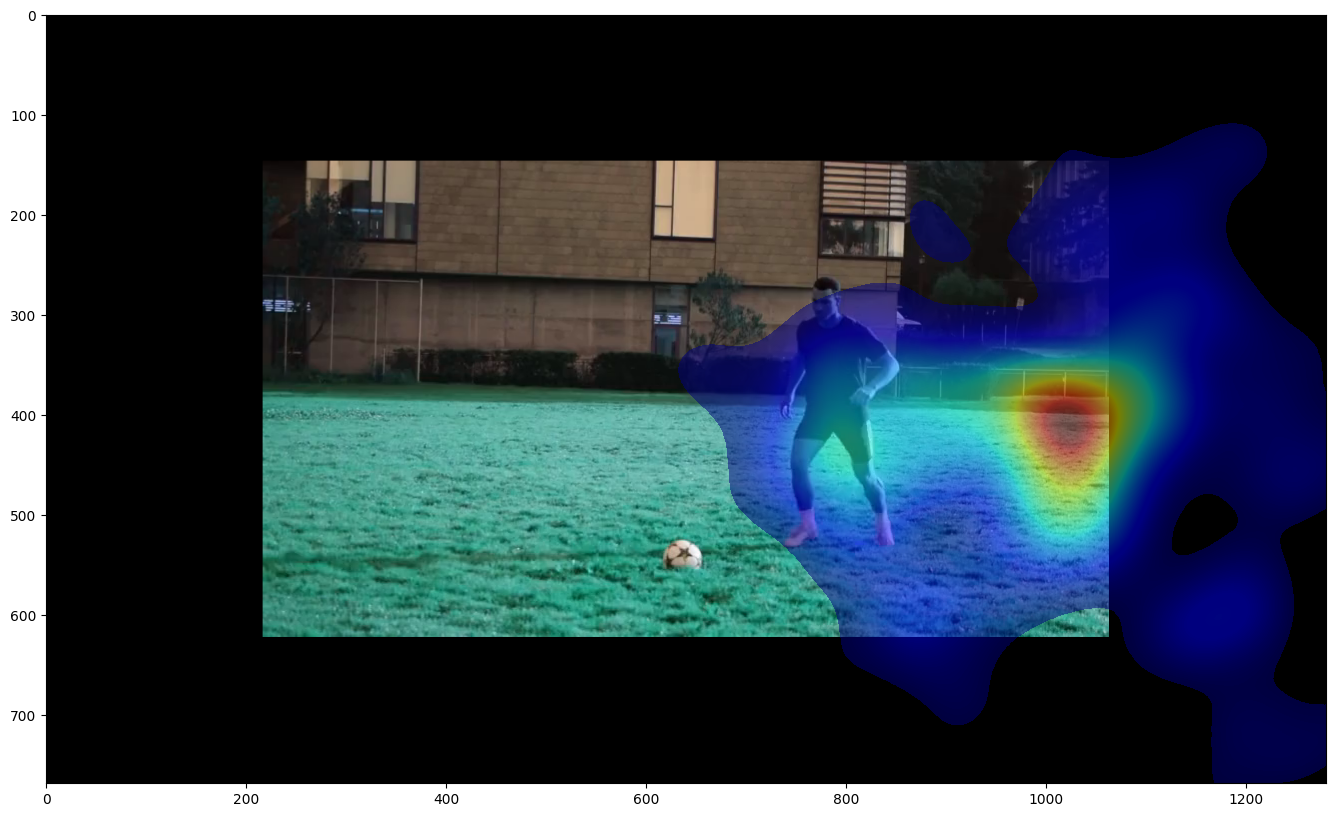

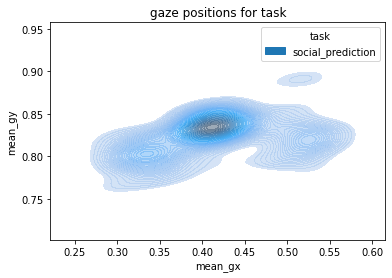

<Figure size 432x288 with 0 Axes>

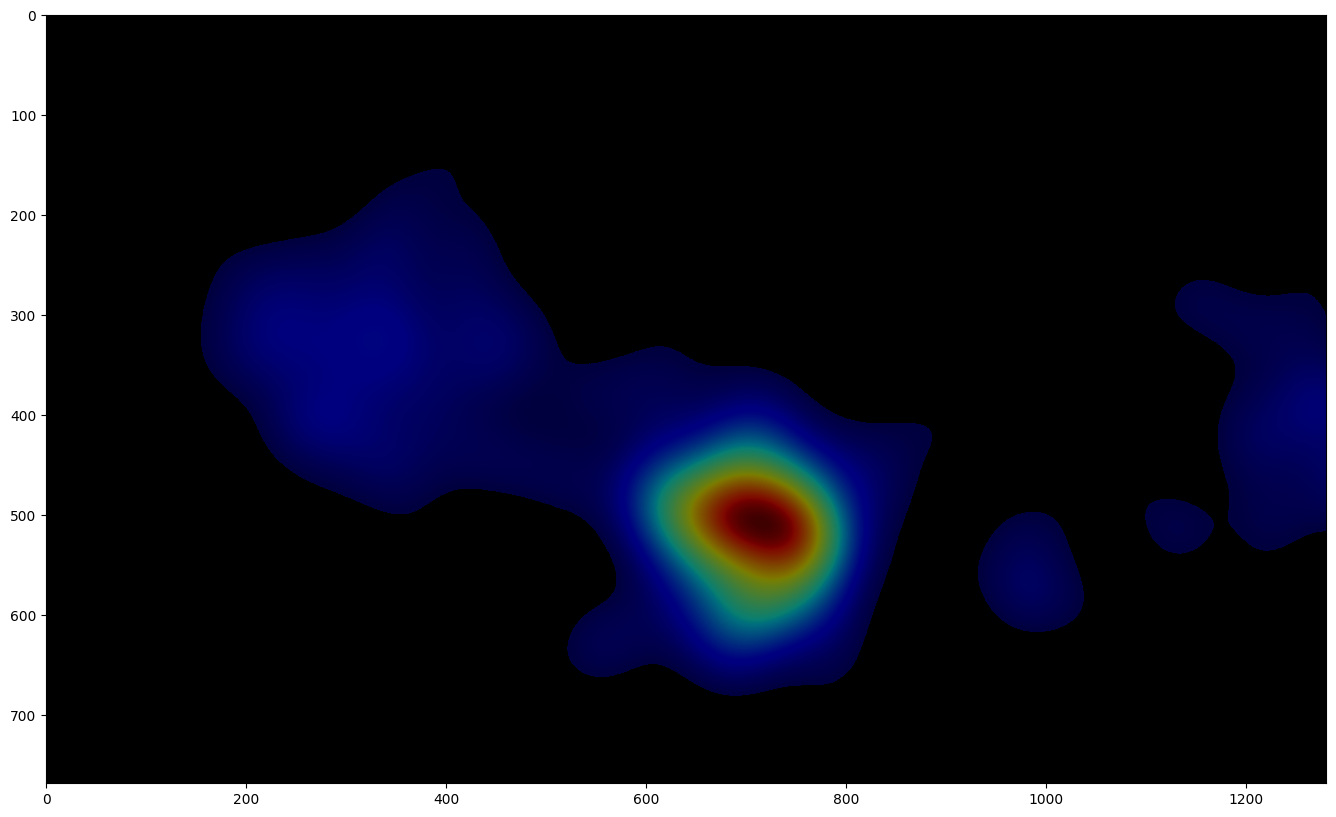

In [27]:
vis_eye.generate_plots()